In [1]:
# !pip install lazypredict --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [2]:
!pip install xgboost


In [3]:
!pip install shap


In [4]:
!pip install boruta


In [5]:
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")
import sklearn
import pandas as pd
import numpy as np
# To visualize the data Which help the reader to achieve quick insights.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
#To standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# classification models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
## To Evaluate the Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
from boruta import BorutaPy
from tqdm import tqdm
tqdm.pandas()

In [7]:
df = pd.read_csv(r'C:\Users\rakes\Documents\Python_Book\heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [12]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
# Missing value counts for each column
missing_counts = df.isnull().sum()
print("Missing Value Counts per Column:")
print(missing_counts)

# Total missing values
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values in the Dataset:", total_missing)

Missing Value Counts per Column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Total Missing Values in the Dataset: 0


In [14]:
# Rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with Missing Values:")
print(missing_rows)

# Number of rows and columns in the dataset
rows, cols = df.shape
print(f"\nDataset Dimensions: {rows} rows, {cols} columns")


Rows with Missing Values:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []

Dataset Dimensions: 299 rows, 13 columns


In [15]:
# Remove rows with any missing values
df_missing_values = df.dropna()

# Confirm dimensions after cleaning
cleaned_rows, cleaned_cols = df_missing_values.shape
print(f"\nDataset Dimensions After Removing Missing Rows: {cleaned_rows} rows, {cleaned_cols} columns")


Dataset Dimensions After Removing Missing Rows: 299 rows, 13 columns


In [16]:
df_missing_values.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
#PubchemFP331,nHBAcc3,SHBint8,nBondsD,nsssN

In [18]:
df_missing_values.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [19]:
df_missing_values["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

**Identify non-numeric columns**

In [20]:
# Identify non-numeric columns
non_numeric_columns = df_missing_values.select_dtypes(exclude=['number']).columns

# Print non-numeric columns
print("Non-numeric or string columns:")
print(non_numeric_columns)

# Create a new DataFrame by dropping the non-numeric columns
df_cleaned = df_missing_values.drop(columns=non_numeric_columns)

# Display the new DataFrame
print("DataFrame after removing non-numeric columns:")
df_cleaned

Non-numeric or string columns:
Index([], dtype='object')
DataFrame after removing non-numeric columns:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Split the data into x and y**

In [21]:
# separating the features and target
x = df_cleaned.drop(columns=["DEATH_EVENT"],axis=1)
y = df_cleaned["DEATH_EVENT"]

In [22]:
#split the data in to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
print(x.shape,x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape)

(299, 12) (239, 12) (60, 12) (299,) (239,) (60,)


**Building Model with all the Molecular descriptors**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ✅ Load the dataset (if not already loaded)
# df = pd.read_csv("your_dataset.csv")

# ✅ Define features and target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# ✅ Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10)

# ✅ Build a pipeline with SMOTE, scaling, and SVM
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=10)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=10))
])

# ✅ Train the model
pipeline.fit(x_train, y_train)

# ✅ Predict
y_pred = pipeline.predict(x_test)

# ✅ Evaluate
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Test Accuracy: 0.8166666666666667

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.68      0.79      0.73        19

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60


📉 Confusion Matrix:
 [[34  7]
 [ 4 15]]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_preds = pipeline.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_preds))

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

# Compute performance metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
specificity = tn / (tn + fp)
npv = tn / (tn + fn)

# Display custom metrics
print(f"\nCustom Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.68      0.79      0.73        19

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60


Custom Performance Metrics:
Accuracy: 0.8167
Sensitivity (Recall): 0.7895
Positive Predictive Value (PPV): 0.6818
Specificity: 0.8293
Negative Predictive Value (NPV): 0.8947


In [26]:
import shap

# Use a sample from test data as the background
background = x_test.sample(50, random_state=10)

# Create SHAP explainer for class probabilities
explainer = shap.Explainer(pipeline.predict_proba, background)

# Explain a subset of test data
shap_values = explainer(x_test[:12])  # Keep small for fast plots

# Get SHAP values for class 1 only
shap_values_class1 = shap_values[..., 1]


PermutationExplainer explainer: 13it [00:14,  2.07s/it]                                                                


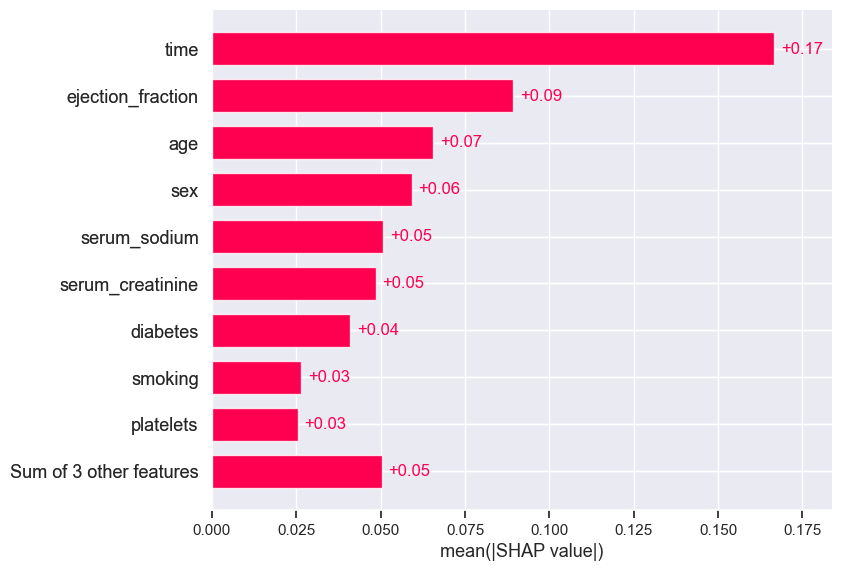

In [27]:
shap.plots.bar(shap_values_class1)

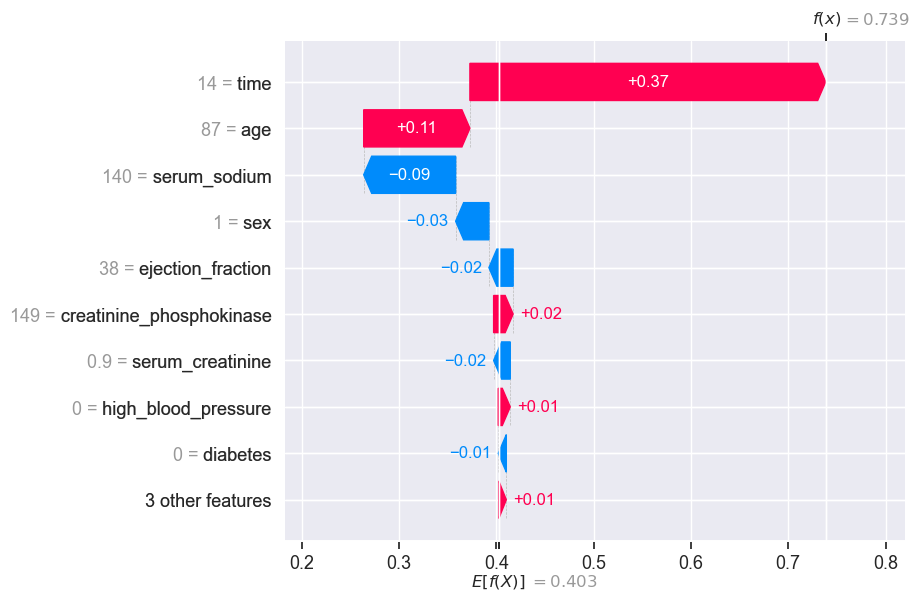

In [28]:
shap.plots.waterfall(shap_values_class1[0])

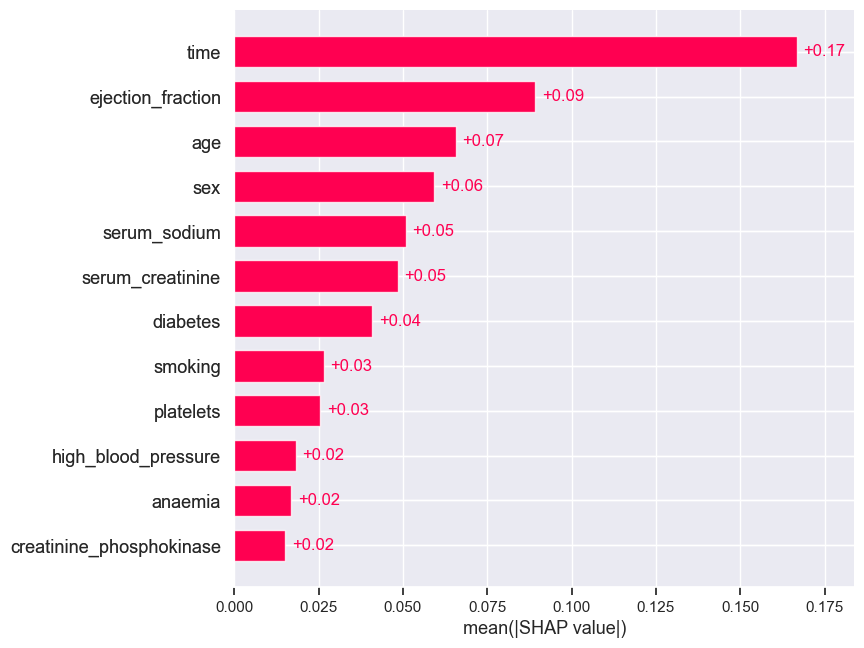

In [29]:
shap.plots.bar(shap_values_class1, max_display=29)

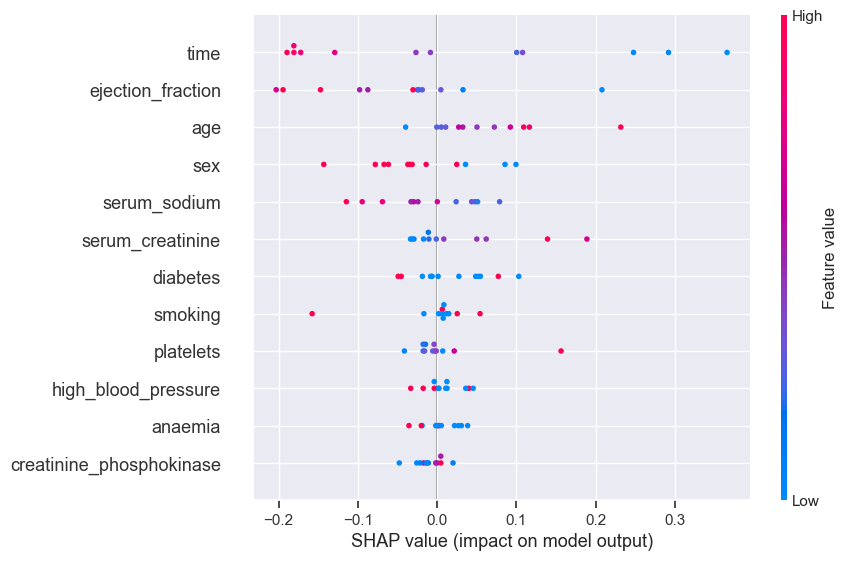

In [30]:
shap.plots.beeswarm(shap_values_class1, max_display=29)

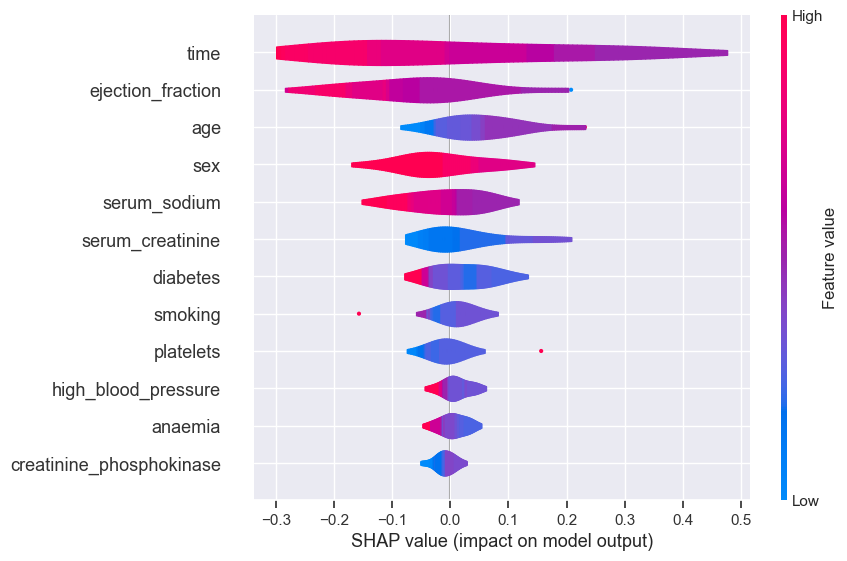

In [31]:
shap.plots.violin(shap_values_class1)

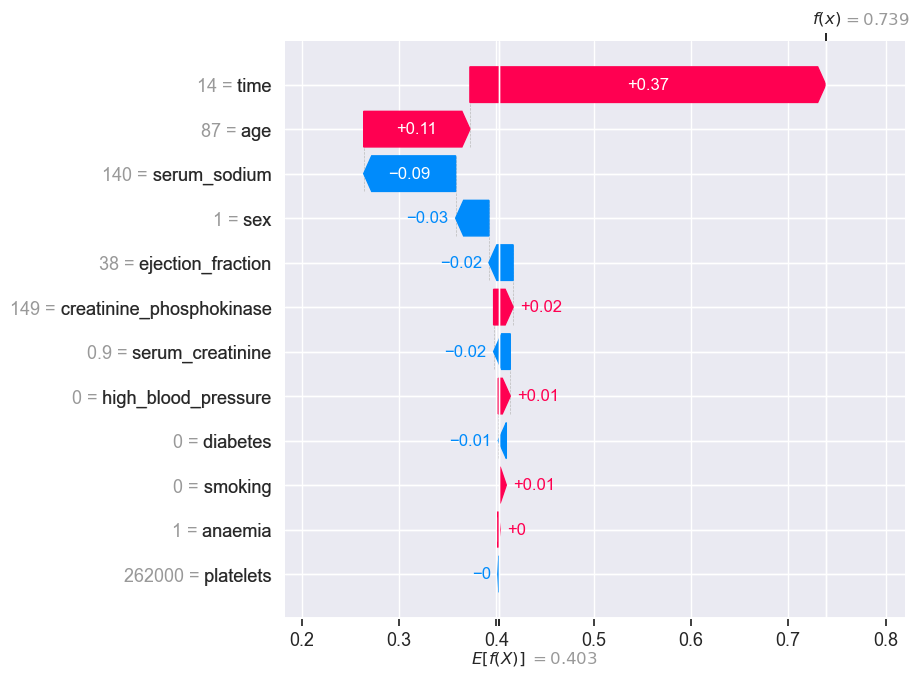

In [32]:
shap.plots.waterfall(shap_values_class1[0], max_display=29)

In [33]:
import pandas as pd
import shap

# Step 1: Use same SHAP explainer setup as before
background = x_test.sample(50, random_state=10)
explainer = shap.Explainer(pipeline.predict_proba, background)

# Step 2: Explain SHAP values for a subset of test data
shap_values = explainer(x_test[:60])  # Enough samples for stable global importance
shap_values_class1 = shap_values[..., 1]

# Step 3: Compute mean absolute SHAP values for each feature
feature_importance = np.abs(shap_values_class1.values).mean(axis=0)
features = x_test.columns

# Step 4: Build DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display
feature_importance_df


PermutationExplainer explainer: 61it [00:52,  1.04s/it]                                                                


,Feature,Importance
11,time,0.140672
4,ejection_fraction,0.094215
8,serum_sodium,0.051491
9,sex,0.046047
0,age,0.045901
7,serum_creatinine,0.042985
3,diabetes,0.042427
6,platelets,0.029597
5,high_blood_pressure,0.021577
2,creatinine_phosphokinase,0.020410


In [34]:
feature_importance_df.to_csv(r"C:\Users\rakes\Downloads\feature_importance_rf.csv")

In [35]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, matthews_corrcoef, precision_recall_curve, auc

# Predictions
y_preds = pipeline.predict(x_test)  # Binary Predictions
y_probs = pipeline.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

# Compute Balanced Accuracy
bacc = balanced_accuracy_score(y_test, y_preds)
print(f"Balanced Accuracy (BACC): {bacc:.4f}")

# Compute Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_preds)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute Precision-Recall AUC (PRC-AUC)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
prc_auc = auc(recall, precision)
print(f"Precision-Recall AUC (PRC-AUC): {prc_auc:.4f}")
#log_loss
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_probs)
print(f"Log Loss: {loss:.4f}")
#hamming_loss
from sklearn.metrics import hamming_loss
hamming = hamming_loss(y_test, y_preds)
print(f"Hamming Loss: {hamming:.4f}")
#fbeta_score
from sklearn.metrics import fbeta_score
f2_score = fbeta_score(y_test, y_preds, beta=2)
print(f"F2-Score: {f2_score:.4f}")

Balanced Accuracy (BACC): 0.8094
Matthews Correlation Coefficient (MCC): 0.5973
ROC-AUC Score: 0.8241
Precision-Recall AUC (PRC-AUC): 0.6090
Log Loss: 0.5230
Hamming Loss: 0.1833
F2-Score: 0.7653


In [36]:
from sklearn.metrics import cohen_kappa_score
# Compute Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_preds)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5935960591133005


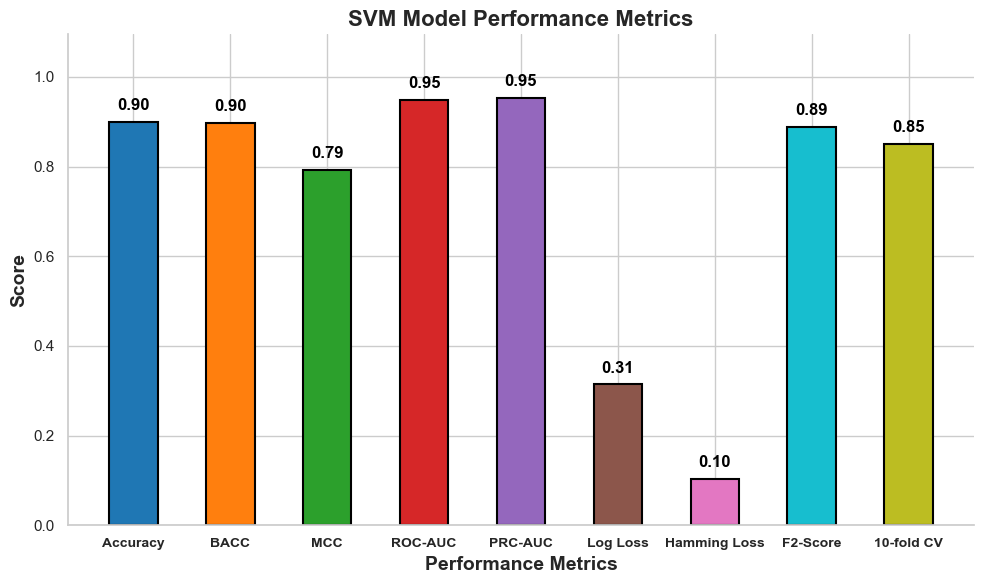

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn style for a clean, professional look
sns.set_style("whitegrid")

# Define performance metrics and values
metrics = [
    "Accuracy", "BACC", "MCC", "ROC-AUC", "PRC-AUC", 
    "Log Loss", "Hamming Loss", "F2-Score", "10-fold CV"
]
values = [0.90, 0.8972, 0.7933, 0.9489, 0.9523, 0.3140, 0.1036, 0.8893, 0.85]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#17becf", "#bcbd22"]  # High-contrast colors

# Create the figure with thin bars
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=colors, edgecolor='black', linewidth=1.5, width=0.5)

# Add value labels on top of the bars (rounded to 2 decimal places)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f"{value:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

# Labels and title
plt.xlabel("Performance Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=14, fontweight='bold')
plt.title("SVM Model Performance Metrics", fontsize=16, fontweight='bold')

# Adjust Y-axis limit for better spacing
plt.ylim(0, max(values) * 1.15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

# Remove unnecessary borders for a cleaner look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 600x600 with 0 Axes>

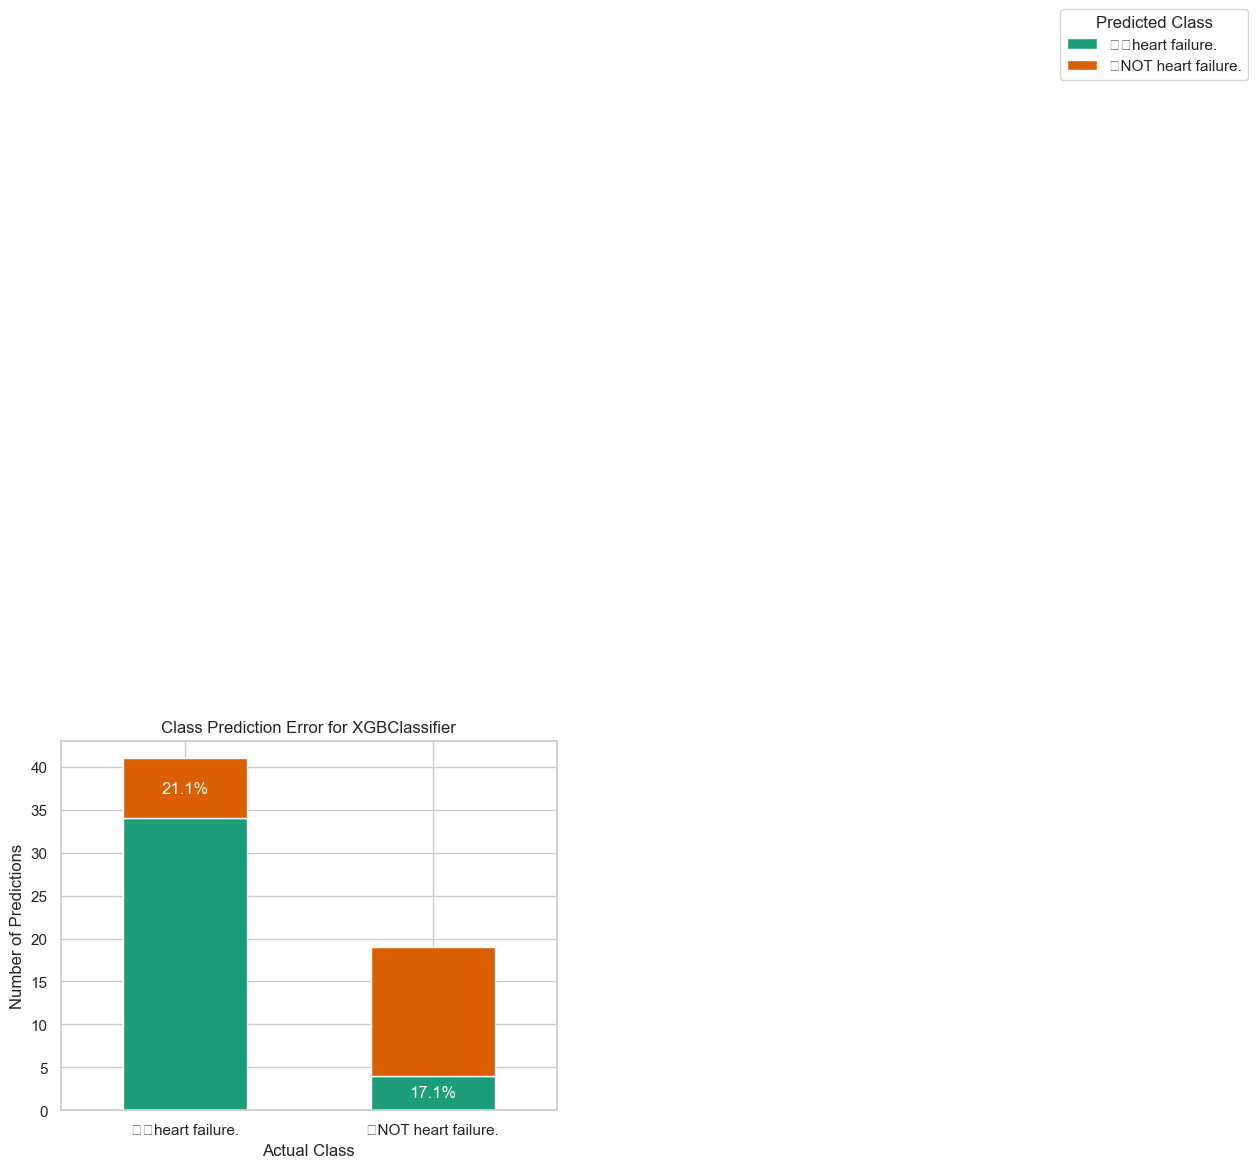

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.colors as mcolors


# Generate confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_df = pd.DataFrame(
    cm,
    index=["⚠️heart failure.", "✅NOT heart failure."],
    columns=["⚠️heart failure.", "✅NOT heart failure."]
)

# Define publication-quality colors:
# For this example, we choose a ColorBrewer pair:
#   - For BBB penetration: "#1b9e77"
#   - For BBB non-penetration: "#d95f02"
custom_cmap = mcolors.ListedColormap(["#1b9e77", "#d95f02"])

# Plot the stacked bar chart using the custom colormap
plt.figure(figsize=(6, 6))
ax = cm_df.plot(kind="bar", stacked=True, colormap=custom_cmap)
plt.title("Class Prediction Error for XGBClassifier")
plt.xlabel("Actual Class")
plt.ylabel("Number of Predictions")
plt.xticks(rotation=0)

# Place the legend outside of the plot
plt.legend(
    title="Predicted Class",
    labels=["⚠️heart failure.", "✅NOT heart failure."],
    bbox_to_anchor=(2,3),
    loc='upper left'
)

# Annotate the error percentage in each bar segment corresponding to errors.
# For each actual class, the error segment is defined as:
#   - If actual class is "BBB penetration", error = predictions for "BBB non-penetration"
#   - If actual class is "BBB non-penetration", error = predictions for "BBB penetration"
n_rows = len(cm_df.index)
n_cols = len(cm_df.columns)

# Loop through each group (each actual class)
for i, actual in enumerate(cm_df.index):
    total = cm_df.loc[actual].sum()
    for j, predicted in enumerate(cm_df.columns):
        count = cm_df.loc[actual, predicted]
        # Identify the error segment for annotation:
        if (actual == "⚠️heart failure." and predicted == "✅NOT heart failure.") or \
           (actual == "✅NOT heart failure." and predicted == "⚠️heart failure."):
            # Calculate error percentage
            error_pct = (count / total) * 100 if total != 0 else 0

            # Find the corresponding patch.
            # In a stacked bar plot using pandas, patches are added in order:
            #   row0-col0, row0-col1, row1-col0, row1-col1, ...
            patch = ax.patches[i * n_cols + j]
            # Determine the center of the patch
            x = patch.get_x() + patch.get_width() / 2.
            y = patch.get_y() + patch.get_height() / 2.

            # Only annotate if there is an error (i.e. count > 0)
            if count > 0:
                ax.text(x, y, f"{error_pct:.1f}%", ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()
